# Visualizing joint and marginal distributions


Let's explore a dataset that has 4 continuous random variables and one discrete random variable. 
We will visualize various 1-D and 2-D marginal distributions. 
The 2-d distributions are joint distributions in the context of the two random variables being plotted, but are marginal distributions in the context of the full dataset.

In [1]:
import seaborn as sns
sns.__version__ # check version, need 0.11.0 or greater

'0.11.0'

In [2]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


First we can visualize the raw data both as a scatter plot of xy-pairs as well as a "rug plot" showing ticks for x and y individually.

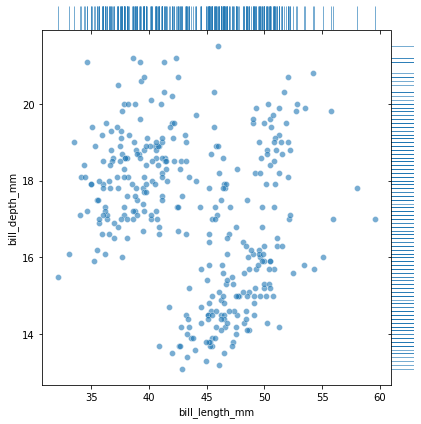

In [3]:
# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", space=0, ratio=15)
g.plot_joint(sns.scatterplot,  alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1,  alpha=.6)

We can make a similar kind of plot, where instead of visualizing the raw data, we use a histogram to approximate the parent distribution both for the joint and for the marginals

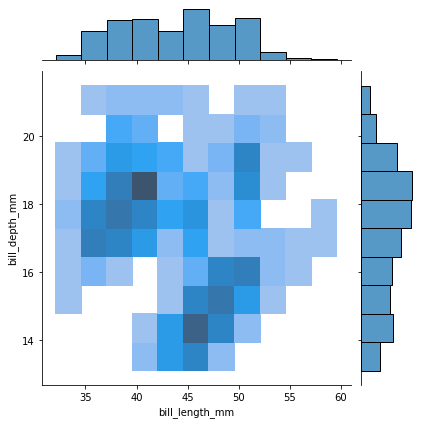

In [4]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hist")

Note the marginal distribution displayed on the top is the same as just a simple histogram of `bill_length_mm`. When we histogram a variable $X_i$, we implicitly are marginalizing over all the other variables in the dataset.

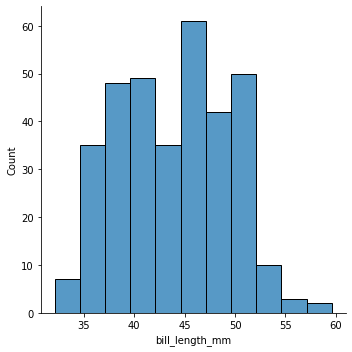

In [5]:
sns.displot(data=penguins, x="bill_length_mm", kind="hist")

Or we can use a kernel density estimation (kde) technique to get a smoother estimate

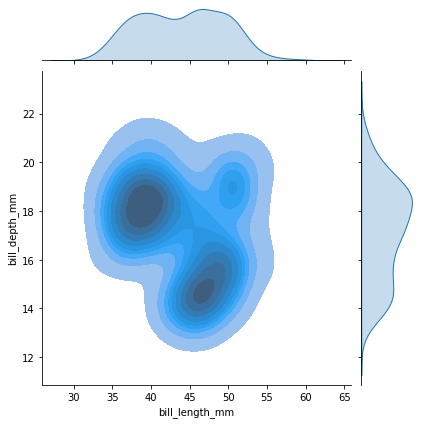

In [6]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", fill=True)

## Grouping by class

We can also look at `bill_length_mm` vs. `bill_depth_mm` grouped by `species`. Before we plot, let's look at the **correlation matrix** for these classes. Note that the two variables are positivley correlated in each case. 

In [7]:
penguins[["bill_length_mm","bill_depth_mm","species"]].groupby("species").corr()

bill_length_mm  bill_depth_mm
species                                                
Adelie    bill_length_mm        1.000000       0.391492
          bill_depth_mm         0.391492       1.000000
Chinstrap bill_length_mm        1.000000       0.653536
          bill_depth_mm         0.653536       1.000000
Gentoo    bill_length_mm        1.000000       0.643384
          bill_depth_mm         0.643384       1.000000

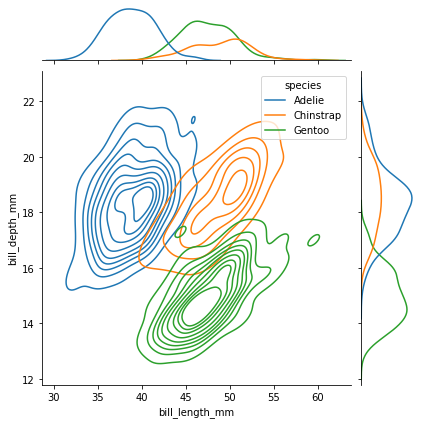

In [8]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", hue="species")

The plot above clearly reveals the origin of the multi-modal structure of the underlying data. Well it doesn't indicate that it causes it, but `species` does seem to naturally map onto the different modes.

## Visualizing multivariate data

Often we are working with higher dimensional data that is not so easy to visualize. In this penguin dataset, there are four continuous random variables in addition to the categorical species label. We can print the 4x4 correlation matrix grouped by species again:

In [9]:
penguins.groupby("species").corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                         
Adelie    bill_length_mm           1.000000       0.391492           0.325785   
          bill_depth_mm            0.391492       1.000000           0.307620   
          flipper_length_mm        0.325785       0.307620           1.000000   
          body_mass_g              0.548866       0.576138           0.468202   
Chinstrap bill_length_mm           1.000000       0.653536           0.471607   
          bill_depth_mm            0.653536       1.000000           0.580143   
          flipper_length_mm        0.471607       0.580143           1.000000   
          body_mass_g              0.513638       0.604498           0.641559   
Gentoo    bill_length_mm           1.000000       0.643384           0.661162   
          bill_depth_mm            0.643384       1.000000           0.706563   
          flipper_length_mm        0.661162       0.706563           1.000000   
          body_mass_g              0.669166       0.719085           0.702667   

                             body_mass_g  
species                                   
Adelie    bill_length_mm        0.548866  
          bill_depth_mm         0.576138  
          flipper_length_mm     0.468202  
          body_mass_g           1.000000  
Chinstrap bill_length_mm        0.513638  
          bill_depth_mm         0.604498  
          flipper_length_mm     0.641559  
          body_mass_g           1.000000  
Gentoo    bill_length_mm        0.669166  
          bill_depth_mm         0.719085  
          flipper_length_mm     0.702667  
          body_mass_g           1.000000

But we can also make what is called a **pairplot** that makes a grid of plots. On the off-diagonal one either plots a scatter plot of $X_i$ vs. $X_j$ or an estimate of $p(X_i,X_j)$ -- note $p(X_i,X_j)$ is 2-d, but it is actually marginalizing over all the other random variables. Along the diagonal $X_i=X_j$, trying to visualize a 2-D distribution doesn't make much sense. Instead, along the diagonal one usually plots the univariate marginal $p(X_i)$. 

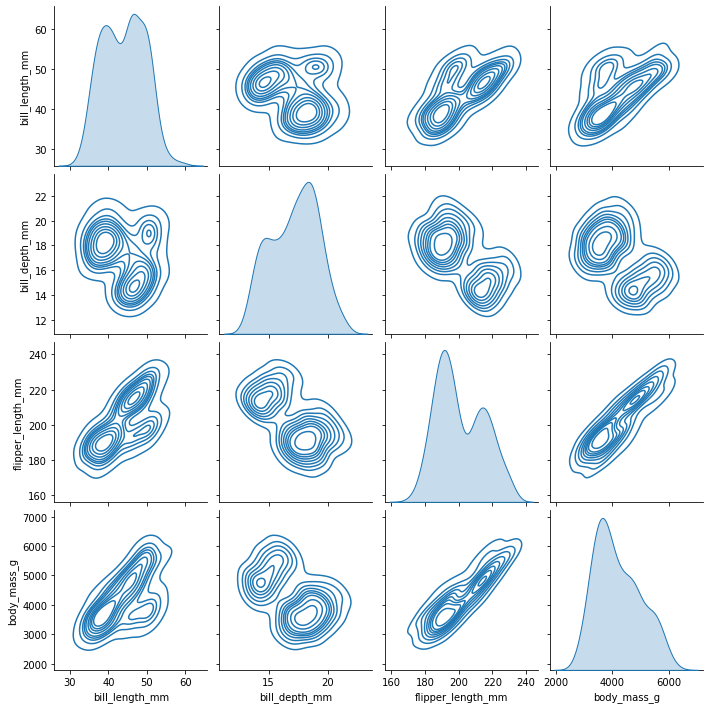

In [10]:
sns.pairplot(penguins, kind="kde")

And we can do both a pairplot grouped by species, which reveals a lot about this dataset.

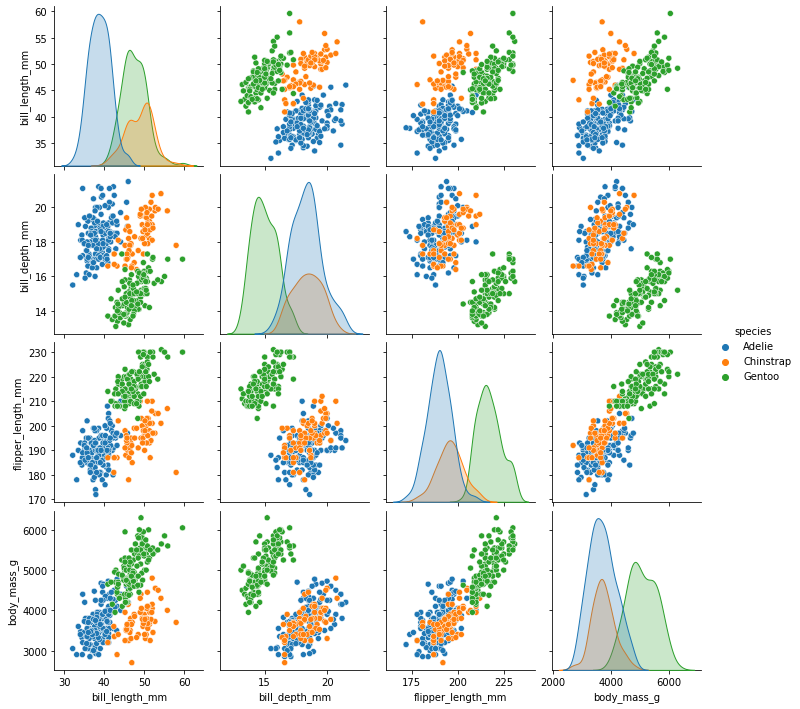

In [11]:
sns.pairplot(penguins, hue="species");

Note there were problems with seaborn 0.10.1
 * [GitHub Issue #2194](https://github.com/mwaskom/seaborn/issues/2194)
 * [stackoverflow](https://stackoverflow.com/questions/63443583/seaborn-valueerror-zero-size-array-to-reduction-operation-minimum-which-has-no )